In [1]:
dfCrime = read.csv("crime_v2.csv")
library(survey)
library(effsize)
library(dplyr)
library(ggplot2)
library(car)
#library(tableone)
#conda install -c conda-forge tableone

Loading required package: grid
Loading required package: Matrix
Loading required package: survival

Attaching package: ‘survey’

The following object is masked from ‘package:graphics’:

    dotchart


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode



In [ ]:
#summary(dfCrime)

In [ ]:
#unique(dfCrime$prbconv)

In [2]:
dfCrime[is.na(dfCrime),]
dfCrime
nrow(dfCrime)

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
92,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,`,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,⋯,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,⋯,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,⋯,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,⋯,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,⋯,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,⋯,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920
13,87,0.0296409,0.365004,0.520606995,0.420833,10.55,0.00133771,0.5169492,30.69649,⋯,366.3004,205.5358,310.1737,259.3391,303.42,449.84,350.72,283.76,0.15237226,0.07073344
15,87,0.0202814,0.392111,0.769231021,0.507692,10.64,0.00103525,0.3009986,34.00304,⋯,353.2182,199.2377,356.1254,206.2816,235.05,416.49,370.62,297.13,0.23495702,0.07430546
17,87,0.0304289,0.251599,0.436441004,0.436893,7.32,0.00129761,0.3503982,34.96204,⋯,346.6011,202.9595,268.3363,208.2520,339.76,389.51,322.06,278.39,0.21818182,0.07769163
19,87,0.0221567,0.162860,1.225610018,0.333333,10.34,0.00202425,0.5767442,61.15251,⋯,613.2261,191.2452,290.5141,266.0934,567.06,403.15,258.33,299.44,0.05334728,0.07713232


[1] 97

In [3]:
dfCrime <-na.omit(dfCrime) # get rid of the NA rows
nrow(dfCrime)

[1] 91

In [4]:
dfCrime[duplicated(dfCrime),]
unique(dfCrime$county)

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
89,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394


[1]   1   3   5   7   9  11  13  15  17  19  21  23  25  27  33  35  37  39  41
[20]  45  47  49  51  53  55  57  59  61  63  65  67  69  71  77  79  81  83  85
[39]  87  89  91  93  97  99 101 105 107 109 111 113 115 117 119 123 125 127 129
[58] 131 133 135 137 139 141 143 145 147 149 151 153 155 157 159 161 163 165 167
[77] 169 171 173 175 179 181 183 185 187 189 191 193 195 197

In [5]:
dfCrime <- dfCrime[!duplicated(dfCrime),] # get rid of the duplicated row
nrow(dfCrime)

[1] 90

In [11]:
dfCrime$prbconv<-as.numeric(levels(dfCrime$prbconv))[dfCrime$prbconv]
#dfCrime$prbconv<-as.double(dfCrime$prbconv)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [ ]:
dfCrime$county<-as.factor(dfCrime$county) #note that we're missing 10 counties from NC; 6 were blank rows in this set, one row was a duplicate

In [ ]:
dfCrime$pctmin80<-dfCrime$pctmin80/100 # units are off in comparison to pctymle; we either divide by 100 here or multiply the other one

In [21]:
#Map central and west to a region code.
# Note that county 71 has both western and central codes
dfCrime$region <- case_when (
            (dfCrime$central ==0 & dfCrime$west ==0) ~ 0, #Eastern, Coastal, Other
            (dfCrime$central ==0 & dfCrime$west ==1) ~ 1, #Western
            (dfCrime$central ==1 & dfCrime$west ==0) ~ 2, #Central
            (dfCrime$central ==1 & dfCrime$west ==1) ~ 3, #Central-Western border county - this could be Charlotte or it could be a coding error.
        )

In [22]:
# create a factor for 'central', 'western', 'central/western' and 'eastern, coastal, other' region
dfCrime$region =
            factor( dfCrime$region , levels = 0:3 , labels =
                    c( 'Region 1',
                       'Region 2',
                       'Region 3',
                       'Region 4'
                      )
                   )

In [ ]:
# create factor for SMSA (standard metropolitan statistical areas) with two levels - inside or outside
#    https://www2.census.gov/prod2/decennial/documents/1980/1980censusofpopu8011uns_bw.pdf
dfCrime$metro =
            factor( dfCrime$urban , levels = 0:1 , labels =
                    c( 'Outside',
                       'Inside'
                      )
                   )

## model 1

In [12]:
mod1 <- lm(dfCrime$crmrte ~ dfCrime$prbconv + dfCrime$taxpc)
mod1
summary(mod1)


Call:
lm(formula = dfCrime$crmrte ~ dfCrime$prbconv + dfCrime$taxpc)

Coefficients:
    (Intercept)  dfCrime$prbconv    dfCrime$taxpc  
       0.021002        -0.017822         0.000585  



Call:
lm(formula = dfCrime$crmrte ~ dfCrime$prbconv + dfCrime$taxpc)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.033910 -0.010210 -0.002763  0.007298  0.051128 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.0210025  0.0061125   3.436 0.000907 ***
dfCrime$prbconv -0.0178223  0.0047835  -3.726 0.000345 ***
dfCrime$taxpc    0.0005850  0.0001292   4.527 1.89e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01585 on 87 degrees of freedom
Multiple R-squared:  0.3112,	Adjusted R-squared:  0.2954 
F-statistic: 19.66 on 2 and 87 DF,  p-value: 9.035e-08


In [13]:
# list out high leverage points and rerun with 
# augment find broom package in tidy
# create new column for dummy variable 0,1 (maybe a package for this?)
# https://stats.idre.ucla.edu/r/modules/coding-for-categorical-variables-in-regression-models/
mod2 <- lm(dfCrime$crmrte ~ (dfCrime$prbconv + dfCrime$wcon*(1+dfCrime$urban)))
mod2
summary(mod2)


Call:
lm(formula = dfCrime$crmrte ~ (dfCrime$prbconv + dfCrime$wcon * 
    (1 + dfCrime$urban)))

Coefficients:
               (Intercept)             dfCrime$prbconv  
                 1.474e-02                  -1.404e-02  
              dfCrime$wcon               dfCrime$urban  
                 8.268e-05                   3.685e-02  
dfCrime$wcon:dfCrime$urban  
                -1.224e-05  



Call:
lm(formula = dfCrime$crmrte ~ (dfCrime$prbconv + dfCrime$wcon * 
    (1 + dfCrime$urban)))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.025235 -0.009620 -0.002084  0.005606  0.042781 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)   
(Intercept)                 1.474e-02  1.074e-02   1.373  0.17340   
dfCrime$prbconv            -1.404e-02  4.232e-03  -3.319  0.00133 **
dfCrime$wcon                8.268e-05  3.626e-05   2.280  0.02509 * 
dfCrime$urban               3.685e-02  2.692e-02   1.369  0.17459   
dfCrime$wcon:dfCrime$urban -1.224e-05  8.137e-05  -0.150  0.88075   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01383 on 85 degrees of freedom
Multiple R-squared:  0.4882,	Adjusted R-squared:  0.4641 
F-statistic: 20.27 on 4 and 85 DF,  p-value: 9.425e-12


### Stepwise functions

In [14]:
#Stepwise AIC to see best model for whole dataset
stepmod<-lm(crmrte~., data = dfCrime)

In [26]:
step<-stepAIC(stepmod,trace=F)

In [27]:
summary(step)


Call:
lm(formula = crmrte ~ prbarr + prbconv + polpc + density + taxpc + 
    pctmin80 + wsta + mix + pctymle, data = dfCrime)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0189254 -0.0046357 -0.0005724  0.0052607  0.0203218 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.511e-02  1.022e-02   3.436  0.00094 ***
prbarr      -5.367e-02  9.211e-03  -5.827 1.13e-07 ***
prbconv     -2.146e-02  3.013e-03  -7.123 4.12e-10 ***
polpc        6.906e+00  1.249e+00   5.530 3.90e-07 ***
density      5.524e-03  6.785e-04   8.141 4.28e-12 ***
taxpc        1.615e-04  7.743e-05   2.086  0.04013 *  
pctmin80     3.951e-04  5.422e-05   7.287 1.98e-10 ***
wsta        -4.052e-05  2.133e-05  -1.900  0.06104 .  
mix         -2.400e-02  1.248e-02  -1.924  0.05796 .  
pctymle      9.063e-02  3.993e-02   2.270  0.02590 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.008033 on 80 degrees of freedom
M

In [18]:
#Stepwise model to see what affects taxes
stepfinmod<-lm(taxpc~., data=dfCrime)
step2<-stepAIC(stepfinmod,trace=F)
summary(step2)


Call:
lm(formula = taxpc ~ crmrte + polpc + west + central + pctmin80 + 
    wcon + wser + wmfg + wfed + pctymle, data = dfCrime)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.484  -5.449  -0.676   5.723  35.366 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.207e+01  1.173e+01   5.291 1.06e-06 ***
crmrte       3.944e+02  7.552e+01   5.222 1.40e-06 ***
polpc        2.976e+03  1.146e+03   2.597 0.011200 *  
west        -1.105e+01  4.026e+00  -2.744 0.007503 ** 
central     -6.368e+00  2.914e+00  -2.185 0.031861 *  
pctmin80    -2.534e-01  9.634e-02  -2.630 0.010262 *  
wcon         5.348e-02  2.809e-02   1.904 0.060613 .  
wser         1.222e-02  5.454e-03   2.241 0.027816 *  
wmfg         2.389e-02  1.456e-02   1.640 0.104895    
wfed        -9.421e-02  2.448e-02  -3.848 0.000240 ***
pctymle     -1.850e+02  4.873e+01  -3.795 0.000288 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.865 o

In [24]:
options(repr.plot.width=6, repr.plot.height=4)

### Operationalization of economic opportunity

In [126]:
# Quantiles for all jobs
dfWage<-mutate(dfCrime,qCon=ntile(dfCrime$wcon,4))
dfWage<-mutate(dfWage,qTuc=ntile(dfCrime$wtuc,4))
dfWage<-mutate(dfWage,qTrd=ntile(dfCrime$wtrd,4))
dfWage<-mutate(dfWage,qFir=ntile(dfCrime$wfir,4))
dfWage<-mutate(dfWage,qSer=ntile(dfCrime$wser,4))
dfWage<-mutate(dfWage,qMfg=ntile(dfCrime$wmfg,4))
dfWage<-mutate(dfWage,qFed=ntile(dfCrime$wfed,4))
dfWage<-mutate(dfWage,qSta=ntile(dfCrime$wsta,4))
dfWage<-mutate(dfWage,qLoc=ntile(dfCrime$wloc,4))

In [130]:
# Average quantile
dfWage$qAvg= (dfWage$qCon+dfWage$qTuc+dfWage$qTrd+dfWage$qFir+dfWage$qSer+dfWage$qMfg+dfWage$qFed+dfWage$qSta+dfWage$qLoc)/9

In [139]:
# Create a new variable called all wages that adds up the different wages
dfWage$allwage=(dfWage$wcon+ dfWage$wtuc + dfWage$wtrd + dfWage$wfir + dfWage$wser + dfWage$wmfg + dfWage$wfed + dfWage$wsta + dfWage$wloc)
dfWage<-mutate(dfWage,qAllwage=ntile(dfWage$allwage,4))
dfWage<-mutate(dfWage,pAllwage=ntile(dfWage$allwage,100))
# Create a variable called crimjust
dfWage$crimjust=dfWage$prbarr*dfWage$prbconv
# Apply urban as a dummy variable
dfWage$pUrban=dfWage$pAllwage*dfWage$urban
dfWage$pTax=dfWage$taxpc*dfWage$urban

In [131]:
head(dfWage)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,qCon,qTuc,qTrd,qFir,qSer,qMfg,qFed,qSta,qLoc,qAvg
1,87,0.0356036,0.298270,0.5275960,0.436170,6.71,0.00182786,2.4226327,30.99368,⋯,3,3,3,4,3,3,3,1,3,2.888889
3,87,0.0152532,0.132029,1.4814800,0.450000,6.35,0.00074588,1.0463320,26.89208,⋯,2,2,2,1,1,2,2,3,2,1.888889
5,87,0.0129603,0.444444,0.2678570,0.600000,6.76,0.00123431,0.4127659,34.81605,⋯,1,1,4,2,1,1,1,2,1,1.555556
7,87,0.0267532,0.364760,0.5254240,0.435484,7.14,0.00152994,0.4915572,42.94759,⋯,4,2,2,1,3,1,2,1,2,2.000000
9,87,0.0106232,0.518219,0.4765630,0.442623,8.22,0.00086018,0.5469484,28.05474,⋯,3,2,3,2,1,2,1,3,4,2.333333
11,87,0.0146067,0.524664,0.0683761,0.500000,13.00,0.00288203,0.6113361,35.22974,⋯,1,2,1,1,2,1,1,1,1,1.222222


In [62]:
wagelm<-lm(crmrte~pAllwage,data=dfWage)
summary(wagelm)


Call:
lm(formula = crmrte ~ pAllwage, data = dfWage)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.035350 -0.010028 -0.005299  0.009382  0.053005 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.054e-02  3.676e-03   5.588 2.53e-07 ***
pAllwage    2.594e-04  6.368e-05   4.073 0.000101 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01742 on 88 degrees of freedom
Multiple R-squared:  0.1586,	Adjusted R-squared:  0.1491 
F-statistic: 16.59 on 1 and 88 DF,  p-value: 0.0001012


In [64]:
# CrimJustice + taxpc
mod3<-lm(crmrte~crimjust + taxpc,data=dfWage)
summary(mod3)


Call:
lm(formula = crmrte ~ crimjust + taxpc, data = dfWage)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.030495 -0.009958 -0.002992  0.005931  0.052197 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0170271  0.0057122   2.981 0.003727 ** 
crimjust    -0.0342368  0.0097873  -3.498 0.000741 ***
taxpc        0.0005754  0.0001308   4.399 3.07e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01598 on 87 degrees of freedom
Multiple R-squared:  0.2998,	Adjusted R-squared:  0.2837 
F-statistic: 18.63 on 2 and 87 DF,  p-value: 1.847e-07


In [65]:
# CrimJustice + all wage quartiles
mod4<-lm(crmrte~crimjust + qAllwage,data=dfWage)
summary(mod4)


Call:
lm(formula = crmrte ~ crimjust + qAllwage, data = dfWage)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.023791 -0.011412 -0.003888  0.008853  0.050925 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.024430   0.004330   5.642 2.06e-07 ***
crimjust    -0.043947   0.009751  -4.507 2.04e-05 ***
qAllwage     0.006472   0.001520   4.258 5.19e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01608 on 87 degrees of freedom
Multiple R-squared:  0.2917,	Adjusted R-squared:  0.2754 
F-statistic: 17.92 on 2 and 87 DF,  p-value: 3.048e-07


In [69]:
# CrimJustice + all wage percentiles
mod6<-lm(crmrte~crimjust + pAllwage,data=dfWage)
summary(mod5)


Call:
lm(formula = crmrte ~ crimjust + pAllwage, data = dfWage)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.026156 -0.010561 -0.005187  0.007413  0.047994 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.689e-02  3.634e-03   7.400 8.08e-11 ***
crimjust    -4.244e-02  9.580e-03  -4.430 2.73e-05 ***
pAllwage     2.682e-04  5.789e-05   4.634 1.25e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01583 on 87 degrees of freedom
Multiple R-squared:  0.3135,	Adjusted R-squared:  0.2977 
F-statistic: 19.87 on 2 and 87 DF,  p-value: 7.831e-08


In [74]:
# prbconv + all wage percentiles
mod6<-lm(crmrte~prbconv + pAllwage,data=dfWage)
summary(mod6)


Call:
lm(formula = crmrte ~ prbconv + pAllwage, data = dfWage)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.025413 -0.010087 -0.003089  0.007520  0.046340 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0317327  0.0039045   8.127 2.73e-12 ***
prbconv     -0.0237873  0.0046346  -5.133 1.72e-06 ***
pAllwage     0.0002976  0.0000566   5.258 1.03e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01535 on 87 degrees of freedom
Multiple R-squared:  0.3542,	Adjusted R-squared:  0.3393 
F-statistic: 23.86 on 2 and 87 DF,  p-value: 5.493e-09


In [75]:
# prbconv + all wage percentiles*urban
mod7<-lm(crmrte~prbconv + pUrban,data=dfWage)
summary(mod7)


Call:
lm(formula = crmrte ~ prbconv + pUrban, data = dfWage)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.026295 -0.010007 -0.001860  0.005854  0.043346 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.885e-02  2.928e-03  13.270  < 2e-16 ***
prbconv     -1.532e-02  4.339e-03  -3.532 0.000663 ***
pUrban       4.221e-04  6.237e-05   6.768 1.45e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01426 on 87 degrees of freedom
Multiple R-squared:  0.4425,	Adjusted R-squared:  0.4297 
F-statistic: 34.53 on 2 and 87 DF,  p-value: 9.14e-12


In [80]:
# prbconv + taxpc*urban
mod8<-lm(crmrte~prbconv + pTax,data=dfWage)
summary(mod8)


Call:
lm(formula = crmrte ~ prbconv + pTax, data = dfWage)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.026627 -0.009272 -0.001634  0.005052  0.043660 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0384603  0.0028652  13.423  < 2e-16 ***
prbconv     -0.0149376  0.0042411  -3.522 0.000684 ***
pTax         0.0007012  0.0000970   7.229 1.78e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01393 on 87 degrees of freedom
Multiple R-squared:  0.4683,	Adjusted R-squared:  0.4561 
F-statistic: 38.32 on 2 and 87 DF,  p-value: 1.164e-12


In [81]:
# prbconv + taxpc*urban
mod9<-lm(crmrte~crimjust + pTax,data=dfWage)
summary(mod9)


Call:
lm(formula = crmrte ~ crimjust + pTax, data = dfWage)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.026191 -0.008554 -0.002010  0.005383  0.045336 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.511e-02  2.098e-03  16.738  < 2e-16 ***
crimjust    -3.070e-02  8.515e-03  -3.606 0.000519 ***
pTax         7.074e-04  9.635e-05   7.341 1.06e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01389 on 87 degrees of freedom
Multiple R-squared:  0.4715,	Adjusted R-squared:  0.4593 
F-statistic: 38.81 on 2 and 87 DF,  p-value: 8.978e-13


In [134]:
# prbconv + taxpc*urban
mod10<-lm(crmrte~prbconv + qAvg,data=dfWage)
summary(mod10)


Call:
lm(formula = crmrte ~ prbconv + qAvg, data = dfWage)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028599 -0.010487 -0.002528  0.008177  0.047946 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.015676   0.006445   2.432   0.0171 *  
prbconv     -0.019561   0.004627  -4.228 5.80e-05 ***
qAvg         0.011495   0.002243   5.125 1.78e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01544 on 87 degrees of freedom
Multiple R-squared:  0.3463,	Adjusted R-squared:  0.3313 
F-statistic: 23.04 on 2 and 87 DF,  p-value: 9.311e-09


In [142]:
# Stepwise for dfWage
stepWage<-lm(crmrte~., data=dfWage)
step3<-stepAIC(stepWage,trace=F)
summary(step3)


Call:
lm(formula = crmrte ~ prbarr + prbconv + polpc + density + taxpc + 
    pctmin80 + wtuc + wser + wmfg + pctymle + qFir + qSer + qSta + 
    pAllwage + crimjust, data = dfWage)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0193602 -0.0045114 -0.0002736  0.0038237  0.0200484 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.572e-02  1.084e-02   4.219 6.87e-05 ***
prbarr      -7.238e-02  1.314e-02  -5.507 5.03e-07 ***
prbconv     -2.450e-02  4.989e-03  -4.910 5.29e-06 ***
polpc        3.343e+00  1.570e+00   2.129 0.036566 *  
density      5.842e-03  7.335e-04   7.965 1.51e-11 ***
taxpc        2.822e-04  7.917e-05   3.564 0.000643 ***
pctmin80     3.490e-04  5.101e-05   6.841 1.94e-09 ***
wtuc        -2.788e-05  1.542e-05  -1.808 0.074701 .  
wser        -1.106e-05  5.793e-06  -1.910 0.060040 .  
wmfg        -3.058e-05  1.379e-05  -2.218 0.029620 *  
pctymle      1.443e-01  3.881e-02   3.719 0.000387 ***
qFir        -2.094

#### Who is the super high tax datapoint?

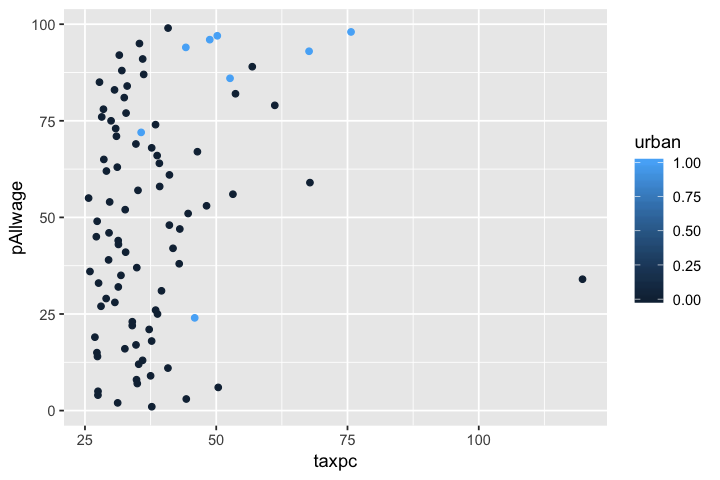

In [90]:
ggplot(data = dfWage, aes(x = taxpc, y = pAllwage, color = urban)) + 
  geom_point()

In [96]:
dfWage%>% filter(taxpc > 100)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,region,qCon,qSer,qMfg,allwage,qAllwage,crimjust,pAllwage,pUrban,pTax
55,87,0.0790163,0.224628,0.207831,0.304348,13.57,0.00400962,0.5115089,119.7615,⋯,Region 1,3,1,2,2796.407,2,0.04668466,34,0,0


In [135]:
library(stargazer)
stargazer(mod1,mod3,mod4,mod5,mod6,mod7,mod8,mod9,mod10,type="text")


                                                                 Dependent variable:                                   
                              -----------------------------------------------------------------------------------------
                               crmrte                                       crmrte                                     
                                 (1)       (2)       (3)       (4)       (5)       (6)       (7)       (8)       (9)   
-----------------------------------------------------------------------------------------------------------------------
prbconv                       -0.018***                                                                                
                               (0.005)                                                                                 
                                                                                                                       
taxpc                         0.001*** 

In [114]:
colSums(dfWage[sapply(dfWage, is.numeric)])

county         year       crmrte       prbarr      prbconv      prbpris 
9.054000e+03 7.830000e+03 3.015893e+00 2.657138e+01 4.957750e+01 3.695631e+01 
      avgsen        polpc      density        taxpc         west      central 
8.720000e+02 1.537176e-01 1.292103e+02 3.434493e+03 2.200000e+01 3.400000e+01 
       urban     pctmin80         wcon         wtuc         wtrd         wfir 
8.000000e+00 2.314157e+03 2.568179e+04 3.698159e+04 1.898293e+04 2.894592e+04 
        wser         wmfg         wfed         wsta         wloc          mix 
2.478041e+04 3.024294e+04 3.983570e+04 3.219662e+04 2.810521e+04 1.161409e+01 
     pctymle         qCon         qSer         qMfg      allwage     qAllwage 
7.562353e+00 2.240000e+02 2.240000e+02 2.240000e+02 2.657531e+05 2.240000e+02 
    crimjust     pAllwage       pUrban         pTax 
1.439499e+01 4.500000e+03 6.600000e+02 4.207523e+02

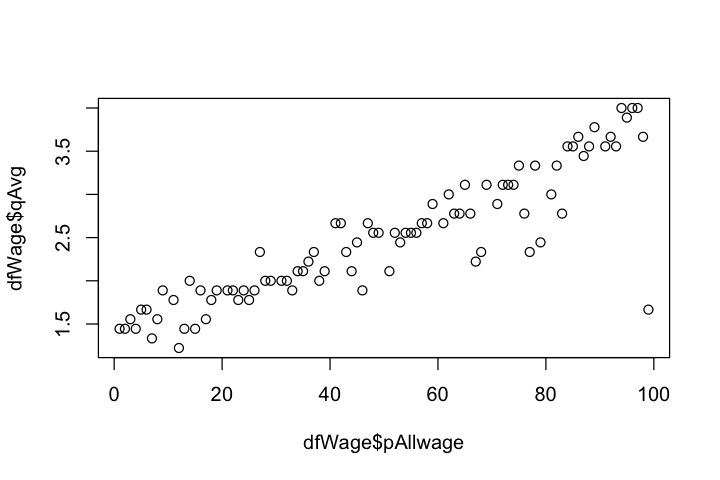

In [141]:
plot(dfWage$pAllwage,dfWage$qAvg)

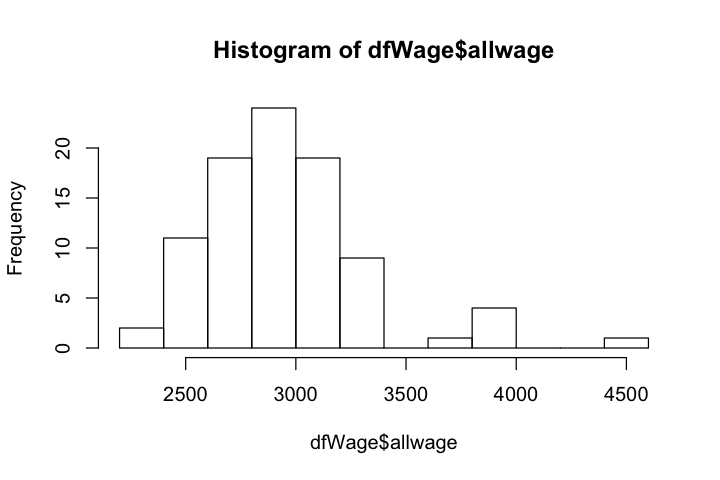

In [148]:
hist(dfWage$allwage)

### Misc work

In [ ]:
options(repr.plot.width=6, repr.plot.height=4)
plot(dfCrime$taxpc,dfCrime$wcon)
plot(dfCrime$taxpc,dfCrime$wtuc)
plot(dfCrime$taxpc,dfCrime$wtrd)

In [ ]:
plot(dfCrime$taxpc,dfCrime$wfir)
plot(dfCrime$taxpc,dfCrime$wser)
plot(dfCrime$taxpc,dfCrime$wmfg)

In [ ]:
plot(dfCrime$taxpc,dfCrime$wfed)
plot(dfCrime$taxpc,dfCrime$wsta)
plot(dfCrime$taxpc,dfCrime$wloc)

In [ ]:
plot(dfCrime$taxpc,dfCrime$urban)

In [ ]:
plot(dfCrime$crmrte,dfCrime$urban)

In [ ]:
hist(dfCrime$taxpc)

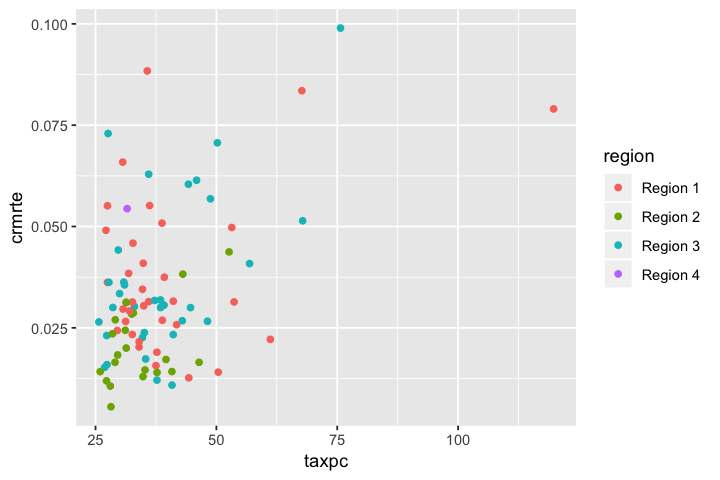

In [25]:
ggplot(data = dfCrime, aes(x = taxpc, y = crmrte, color = region)) + 
  geom_point()

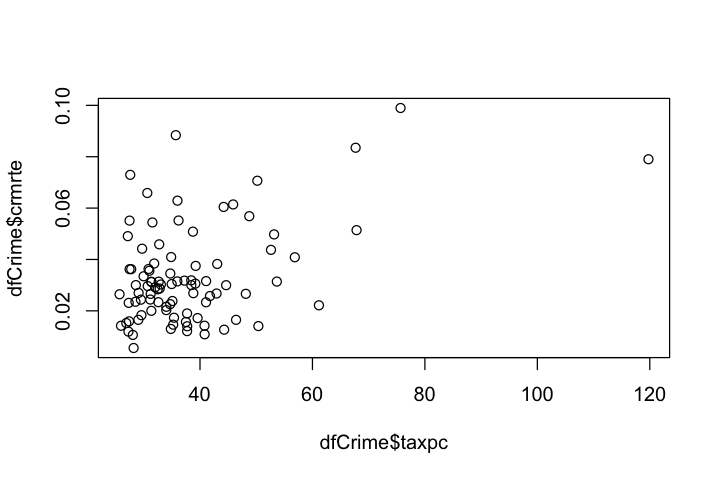

In [30]:
plot(dfCrime$taxpc,dfCrime$crmrte)
abline(dfCrime$taxpc,dfCrime$crmrte)

###Univariate analysis on Crime Rate

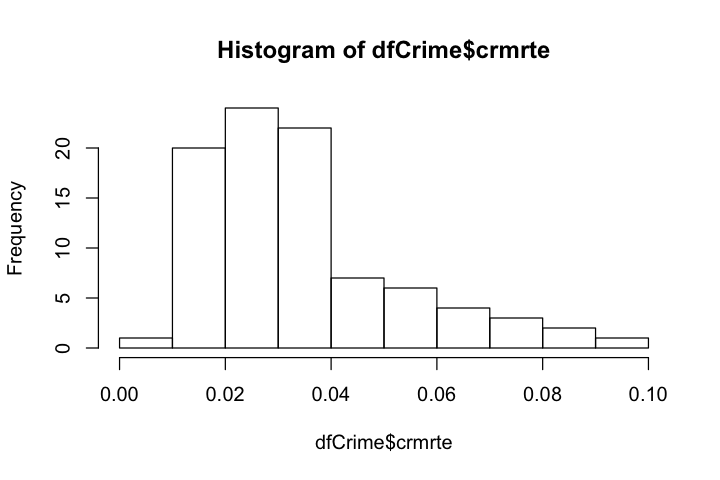

In [150]:
hist(dfCrime$crmrte)

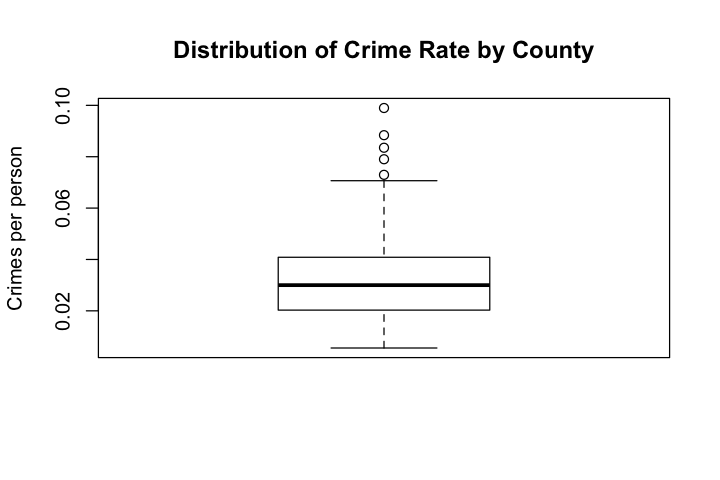

In [155]:
boxplot(dfCrime$crmrte, main="Distribution of Crime Rate by County", ylab="Crimes per person")

In [151]:
summary(dfCrime$crmrte)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005533 0.020604 0.030002 0.033510 0.040249 0.098966 

In [153]:
length(dfCrime$crmrte)

[1] 90